# Script para fazer análise exploratória dos discursos da câmara federal
- analisar frequência de termos(tokens)
- analisar frequencia N-grams (2grams, 3grams)

Esse procedimento será feito para tentar identificar alguma informação útil ou mais alguma limpeza que seja necessária ser feita em `limpa-texto`

In [ ]:
#https://kavita-ganesan.com/how-to-use-countvectorizer/#.XubRLkVKhPY
# https://github.com/jbesomi/texthero

In [ ]:
# NOVAS STOPWORDS 'casa','nesta','desta', 'quero'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.feature_extraction.text import CountVectorizer
import pickle
import numpy as np

%matplotlib inline

In [3]:
def make_vectorize(data, column, ngram = (2,2)):
    vectorizer = CountVectorizer(ngram_range = ngram)#,max_features=200000)
    df = pd.DataFrame()
    temp = 0
    qtd_rows = int(len(data)*0.1)
    for i in range(0,len(data),qtd_rows):
        fim_linha = i+qtd_rows
        d = data.loc[i:fim_linha,column]
        vectorizer.fit(d)    
        vector = vectorizer.transform(d)
        
        print(i,fim_linha, vector.shape)
        
        count_tokens = pd.DataFrame({'token':vectorizer.get_feature_names(),'qtd':vector.toarray().sum(axis=0)})
        df = pd.concat([df,count_tokens])
    
    group_by = df.groupby(['token']).qtd.sum()
    df = pd.DataFrame({'token':group_by.index,'qtd':group_by.values})
    return df

In [4]:
directory = "/disco01/gabriel/"#../data/csvs/"


In [5]:
#discursos = pd.read_csv(directory+'discursos_plen_limpo.csv')
discursos = pd.read_json(directory+'discursos_plen_limpo.json')

In [ ]:
#meta_data_discurso = pd.read_csv(directory+'discursos_plen.csv')

In [ ]:
discursos.info()

In [6]:
discursos.isna().sum()

FILE             0
CLEAN_CONTENT    0
SESSION_TYPE     0
SESSION_DATE     0
MONTH            0
YEAR             0
SPEAKER_COUNT    0
HORA             0
ORADOR_CLEAN     0
PARTIDO          0
UF_PARTIDO       0
dtype: int64

In [7]:
discursos.dropna(inplace = True)
discursos.index = [i for i in range(0,len(discursos))]

In [8]:
discursos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113143 entries, 0 to 113142
Data columns (total 11 columns):
FILE             113143 non-null object
CLEAN_CONTENT    113143 non-null object
SESSION_TYPE     113143 non-null object
SESSION_DATE     113143 non-null object
MONTH            113143 non-null int64
YEAR             113143 non-null int64
SPEAKER_COUNT    113143 non-null int64
HORA             113143 non-null object
ORADOR_CLEAN     113143 non-null object
PARTIDO          113143 non-null object
UF_PARTIDO       113143 non-null object
dtypes: int64(3), object(8)
memory usage: 10.4+ MB


In [ ]:
discursos.isna().sum()

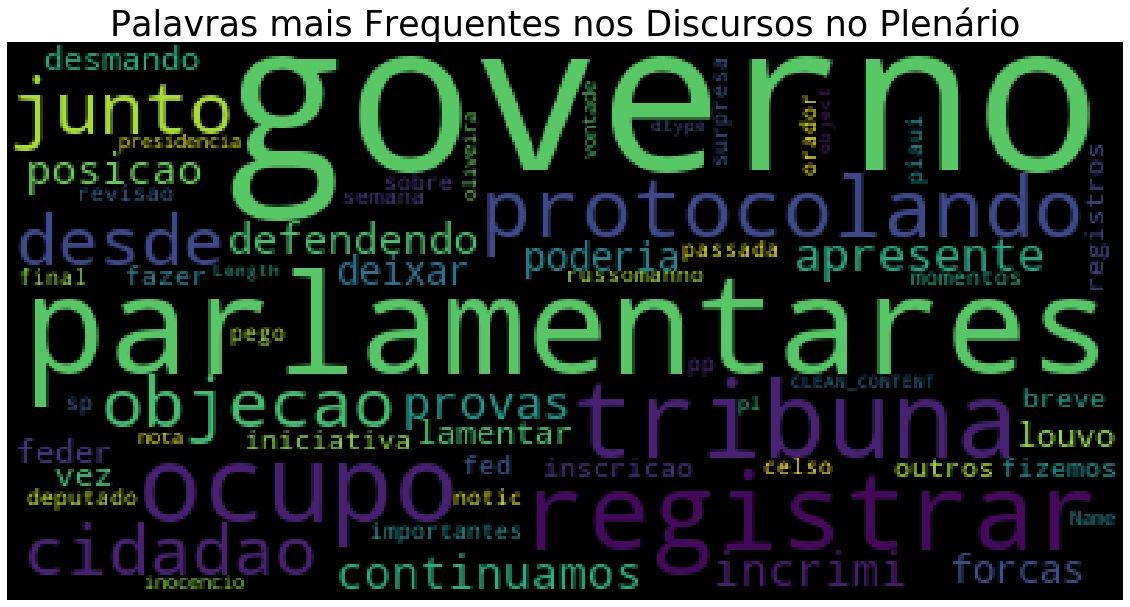

In [9]:
wordcloud = WordCloud(background_color='black',
                          #stopwords=stop_words,
                      max_words=100,
                      max_font_size=75, 
                      random_state=42
                     ).generate(str(discursos.CLEAN_CONTENT))
print(wordcloud)

plt.figure(figsize=(20,15))
#fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Palavras mais Frequentes nos Discursos no Plenário',fontsize = 35)
plt.show()
#fig.savefig("word1.png", dpi=900)

In [10]:
### AMOSTRA PARA TESTE
amostra = discursos#.sample(int(len(discursos)*.1))
amostra.index = [i for i in range(0,len(amostra))]
#amostra.reset_index(level=0,inplace = True)
len(amostra)

113143

## Bag of words (matriz com contagem absolutas das palavras)

## UNIGRAM

In [11]:
vectorizer   = CountVectorizer(ngram_range = (1,1),min_df=0.02)
vectorizer.fit(amostra.CLEAN_CONTENT)
vector = vectorizer.transform(amostra.CLEAN_CONTENT)
print(vector.shape)

(113143, 1638)


In [12]:

with open(directory+'vector_unigram.pkl','wb') as f:
    pickle.dump(vector,f)
    
with open(directory+'vectorizer_unigram.pkl','wb') as f:
    pickle.dump(vectorizer,f)

In [46]:
## criando dataframe com matriz das plavras
#uni_token_df = pd.DataFrame(vector.toarray(),columns=vectorizer.get_feature_names())

count_tokens = pd.DataFrame({'token':vectorizer.get_feature_names(),'qtd':vector.toarray().sum(axis=0)})
count_tokens.sort_values(by = 'qtd',ascending=False, inplace = True)
count_tokens.to_csv(directory+'df_unigram_count.csv',index=False)


## BIGRAM

In [21]:
vectorizer2   = CountVectorizer(ngram_range = (2,2),min_df=0.005)
vectorizer2.fit(amostra.CLEAN_CONTENT)
vector2 = vectorizer2.transform(amostra.CLEAN_CONTENT)
print(vector2.shape)

(113143, 1207)


In [43]:

with open(directory+'vector_bigram.pkl','wb') as f:
    pickle.dump(vector2,f)
    
with open(directory+'vectorizer_bigram.pkl','wb') as f:
    pickle.dump(vectorizer2,f)

In [47]:
## criando dataframe com matriz das plavras
count_tokens_2 = pd.DataFrame({'token':vectorizer2.get_feature_names(),'qtd':vector2.toarray().sum(axis=0)})
count_tokens_2.sort_values(by = 'qtd',ascending=False, inplace = True)
count_tokens_2.to_csv(directory+'df_bigram_count.csv',index=False)


## TRIGRAM

In [40]:
vectorizer3   = CountVectorizer(ngram_range = (3,3), min_df = 0.001)
vectorizer3.fit(amostra.CLEAN_CONTENT)
vector3 = vectorizer3.transform(amostra.CLEAN_CONTENT)
print(vector3.shape)


(113143, 1858)


In [44]:

with open(directory+'vector_trigram.pkl','wb') as f:
    pickle.dump(vector3,f)
    
with open(directory+'vectorizer_trigram.pkl','wb') as f:
    pickle.dump(vectorizer3,f)

In [49]:
## criando dataframe com matriz das plavras
count_tokens_3 = pd.DataFrame({'token':vectorizer3.get_feature_names(),'qtd':vector3.toarray().sum(axis=0)})
count_tokens_3.sort_values(by = 'qtd',ascending=False, inplace = True)
count_tokens_3.to_csv(directory+'df_trigram_count.csv',index=False)


## TF-IDF (UNIGRAM)

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_ifd = TfidfVectorizer(ngram_range = (1,1),min_df=0.02)
vector_ifd = vectorizer_ifd.fit_transform(amostra['CLEAN_CONTENT'])

In [52]:
vector_ifd.shape

(113143, 1638)

In [53]:

with open(directory+'vector_tf_unigram.pkl','wb') as f:
    pickle.dump(vector_ifd,f)
    
with open(directory+'vectorizer_tf_unigram.pkl','wb') as f:
    pickle.dump(vectorizer_ifd,f)

In [83]:
## criando dataframe com matriz das plavras
count_tf_tokens = pd.DataFrame({'token':vectorizer_ifd.get_feature_names(),'qtd':vector_ifd.toarray().sum(axis=0)})
count_tf_tokens.sort_values(by = 'qtd',ascending=False, inplace = True)
count_tf_tokens.index = [i for i in range(len(count_tf_tokens))]

count_tf_tokens.to_csv(directory+'df_tf_nigram_count.csv',index=False)


## TF-IDF (BIGRAM)

In [58]:

vectorizer_ifd_2 = TfidfVectorizer(ngram_range = (2,2),min_df=0.005)
vector_ifd_2 = vectorizer_ifd_2.fit_transform(amostra['CLEAN_CONTENT'])
print(vector_ifd_2.shape)



(113143, 1207)


In [59]:
with open(directory+'vector_tf_bigram.pkl','wb') as f:
    pickle.dump(vector_ifd_2,f)
    
with open(directory+'vectorizer_tf_bigram.pkl','wb') as f:
    pickle.dump(vectorizer_ifd_2,f)

In [85]:
## criando dataframe com matriz das plavras
count_tf_tokens_2 = pd.DataFrame({'token':vectorizer_ifd_2.get_feature_names(),'qtd':vector_ifd_2.toarray().sum(axis=0)})
count_tf_tokens_2.sort_values(by = 'qtd',ascending=False, inplace = True)
count_tf_tokens_2.index = [i for i in range(len(count_tf_tokens_2))]
count_tf_tokens_2.to_csv(directory+'df_tf_bigram_count.csv',index=False)


## TF-IDF (trigram)

In [61]:
vectorizer_ifd_3 = TfidfVectorizer(ngram_range = (3,3),min_df=0.001)
vector_ifd_3 = vectorizer_ifd_3.fit_transform(amostra['CLEAN_CONTENT'])
print(vector_ifd_3.shape)


(113143, 1858)


In [62]:
with open(directory+'vector_tf_trigram.pkl','wb') as f:
    pickle.dump(vector_ifd_3,f)
    
with open(directory+'vectorizer_tf_trigram.pkl','wb') as f:
    pickle.dump(vectorizer_ifd_3,f)

In [86]:
## criando dataframe com matriz das plavras
count_tf_tokens_3 = pd.DataFrame({'token':vectorizer_ifd_3.get_feature_names(),'qtd':vector_ifd_3.toarray().sum(axis=0)})
count_tf_tokens_3.sort_values(by = 'qtd',ascending=False, inplace = True)
count_tf_tokens_3.index = [i for i in range(len(count_tf_tokens_3))]
count_tf_tokens_3.to_csv(directory+'df_tf_trigram_count.csv',index=False)


In [ ]:
df_2 = make_vectorize(amostra, 'CLEAN_CONTENT', ngram = (2,2))
#df_2.to_csv('df_bigram.csv',index=False)


In [ ]:
df_3 = make_vectorize(amostra, 'CLEAN_CONTENT', ngram = (3,3))
#df_3.to_csv('count_trigram.csv',index = False)

## Análise da frequência de tokens(words)
`top 100`

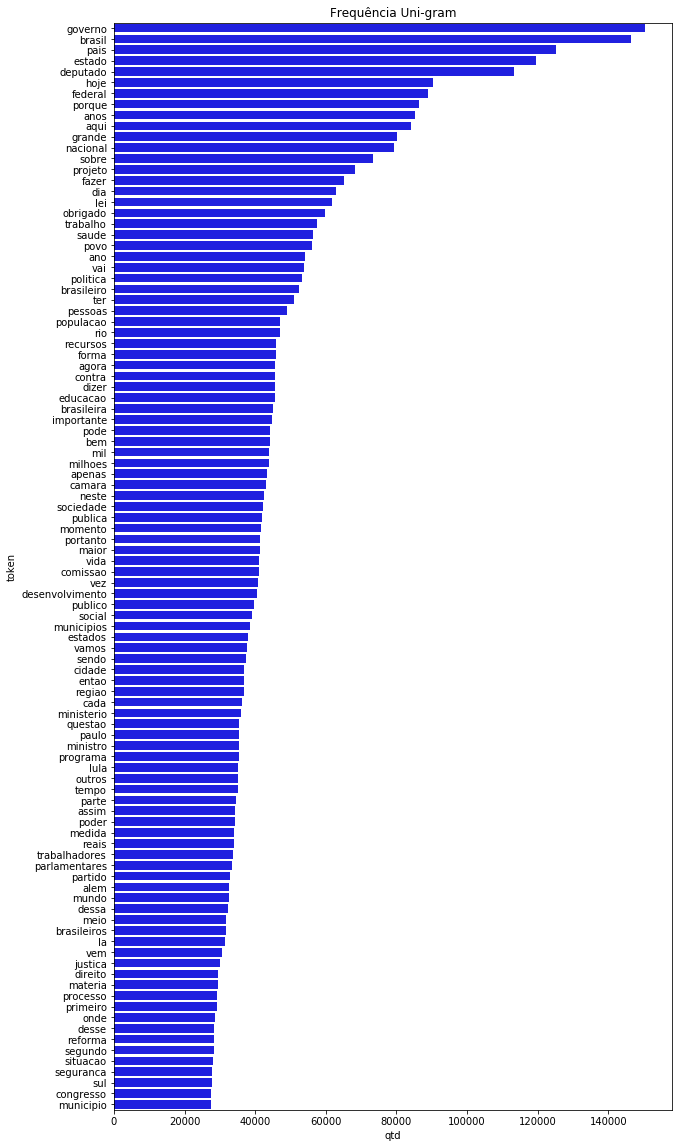

In [78]:
i = 100
plt.figure(figsize=(10,20))
sns.barplot(y = 'token', x = 'qtd', data = count_tokens.iloc[:i,:], color = 'blue')
plt.title('Frequência Uni-gram')
plt.show()


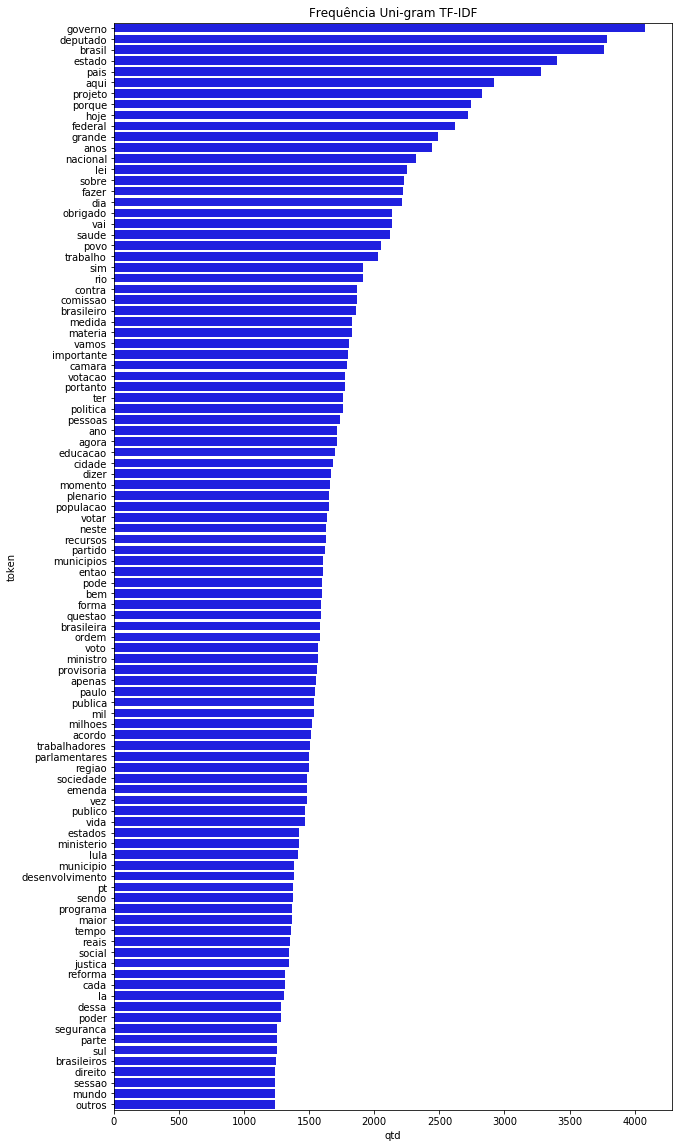

In [84]:
plt.figure(figsize=(10,20))
sns.barplot(y = 'token', x = 'qtd', data = count_tf_tokens.iloc[:i,:], color = 'blue')
plt.title('Frequência Uni-gram TF-IDF')
plt.show()

## Análise da frequência de 2-grams (2 palavras )
`top 100`

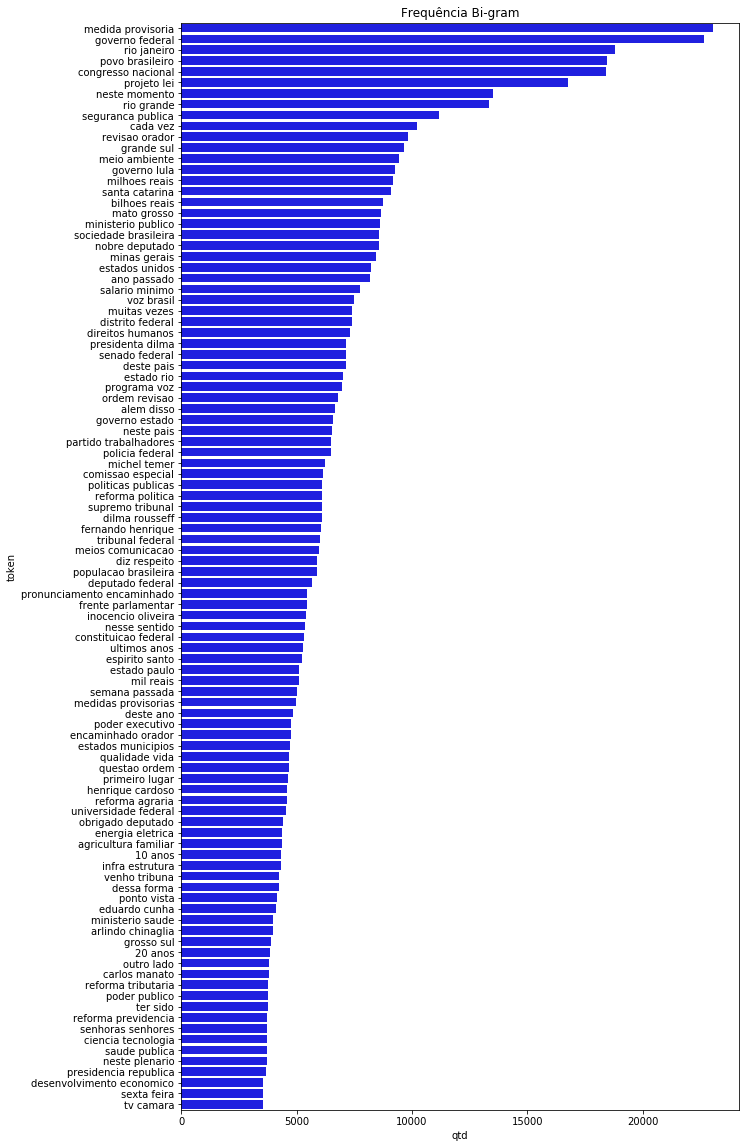

In [65]:
plt.figure(figsize=(10,20))
sns.barplot(y = 'token', x = 'qtd', data = count_tokens_2.iloc[:i,:], color = 'blue')
plt.title('Frequência Bi-gram')
plt.show()


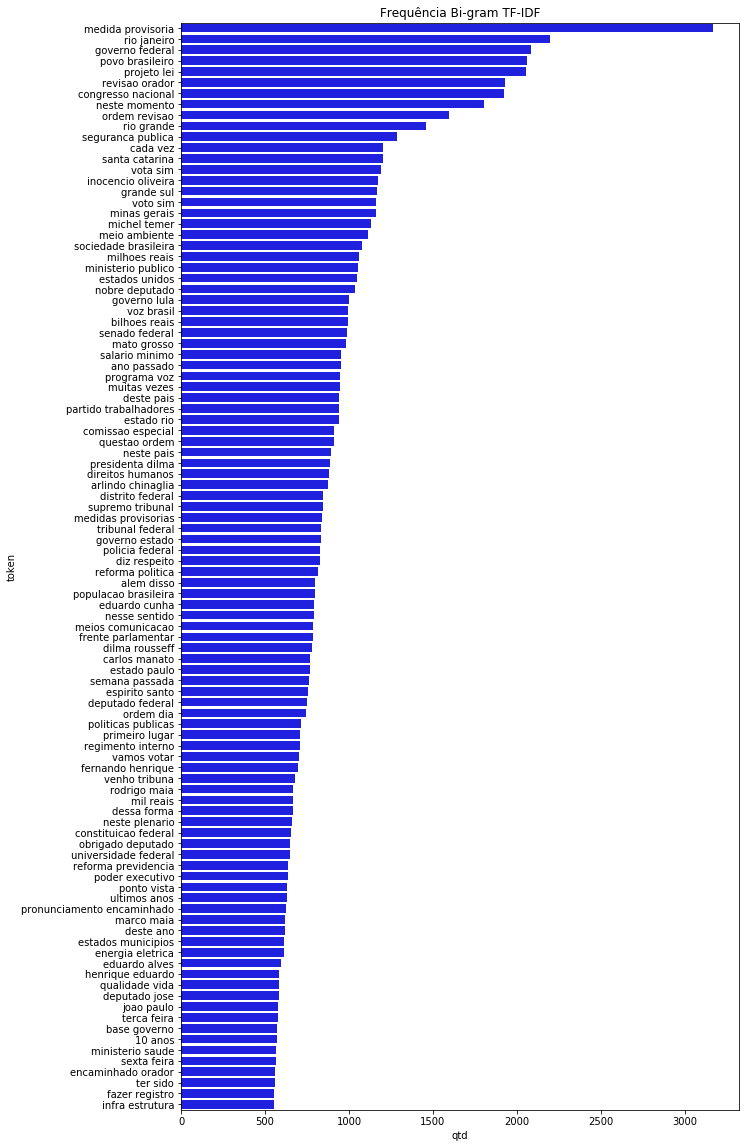

In [87]:
plt.figure(figsize=(10,20))
sns.barplot(y = 'token', x = 'qtd', data = count_tf_tokens_2.iloc[:i,:], color = 'blue')
plt.title('Frequência Bi-gram TF-IDF')
plt.show()

## Análise da frequência de 3-grams(3 palavras)
`top 100`

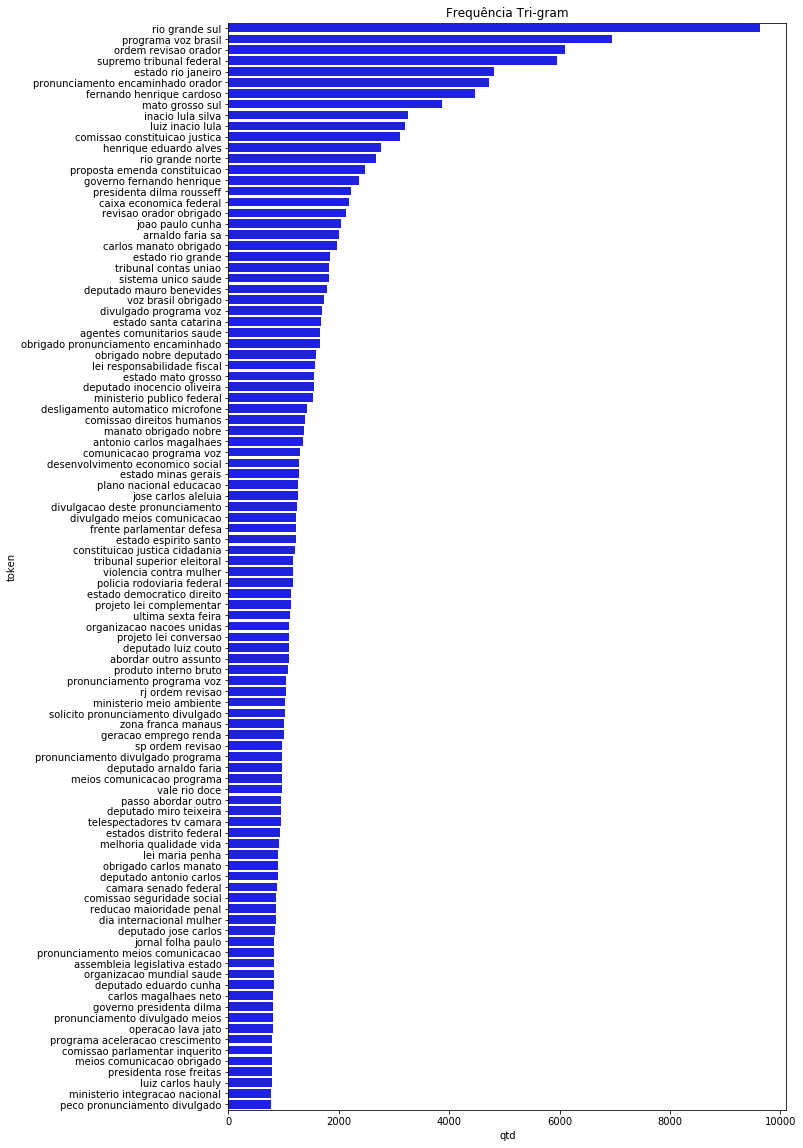

In [66]:
plt.figure(figsize=(10,20))
sns.barplot(y = 'token', x = 'qtd', data = count_tokens_3.iloc[:i,:], color = 'blue')
plt.title('Frequência Tri-gram')
plt.show()


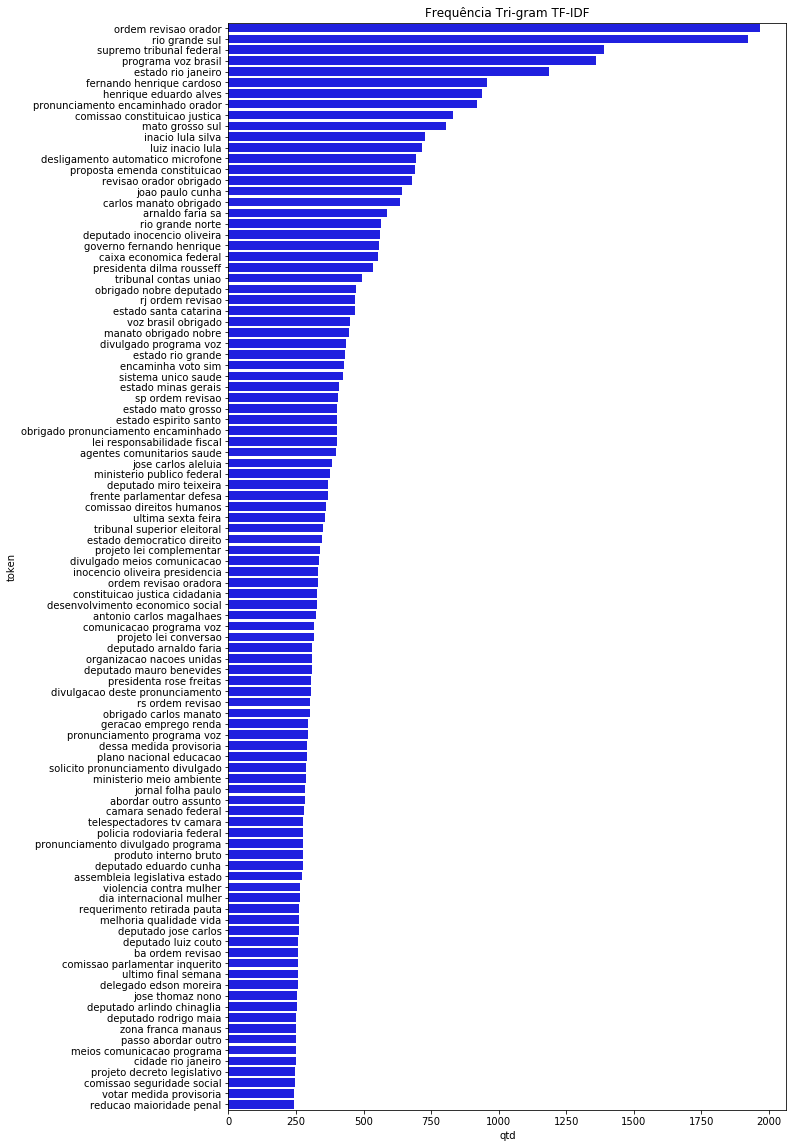

In [89]:
plt.figure(figsize=(10,20))
sns.barplot(y = 'token', x = 'qtd', data = count_tf_tokens_3.iloc[:i,:], color = 'blue')
plt.title('Frequência Tri-gram TF-IDF')
plt.show()

## Análise de palavras únicas por ano(legislatura)


In [67]:
lista_mandatos = [(2003 , 2006),(2007 , 2010),(2011 , 2014),(2015 , 2018),(2019 , 2020)]

In [68]:
lista_token_unicos = []
for i, ano in enumerate(lista_mandatos):
    vectorizer = CountVectorizer(ngram_range = (1,1))
    texto      = discursos.loc[(discursos.YEAR >= ano[0]) & (discursos.YEAR <= ano[1]),'CLEAN_CONTENT']
    vector     = vectorizer.fit_transform(texto)
    print( (str(ano[0]) + '-' + str(ano[1]), vector.shape[0], vector.shape[1]) )
    lista_token_unicos.append( (str(ano[0]) + '-' + str(ano[1]), vector.shape[0], vector.shape[1]) )


('2003-2006', 22305, 101653)
('2007-2010', 24587, 100567)
('2011-2014', 24944, 99826)
('2015-2018', 27241, 92593)
('2019-2020', 5785, 44417)


In [69]:
tokens_unicos_legislatura = pd.DataFrame(lista_token_unicos,
                                         columns = ['ano_legislatura','qtd_discursos','qtd_palavras_unica'])


In [70]:
tokens_unicos_legislatura.to_csv(directory+'token_unicos_legislatura.csv',index=False)

In [71]:
tokens_unicos_legislatura['qtd_discursos_log'] = np.log(tokens_unicos_legislatura.qtd_discursos)
tokens_unicos_legislatura['palavras_log'] = np.log(tokens_unicos_legislatura.qtd_palavras_unica)


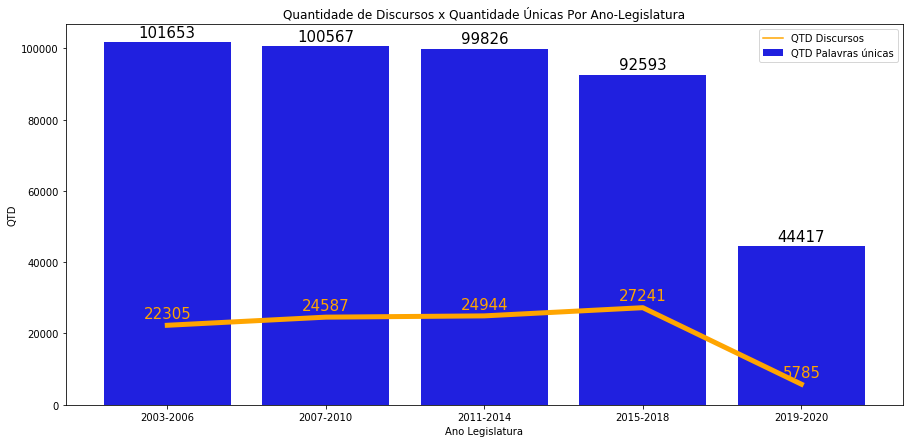

In [72]:
plt.figure(figsize=(15,7))
b= sns.barplot(x = 'ano_legislatura',y = 'qtd_palavras_unica', data = tokens_unicos_legislatura, 
            color = 'blue', label = 'QTD Palavras únicas')

for index, row in tokens_unicos_legislatura.iterrows():
    b.text(row.name,row.qtd_palavras_unica+1500, round(row.qtd_palavras_unica,2), color='black', 
           ha="center", size = 15)


l = sns.lineplot(x = 'ano_legislatura',y = 'qtd_discursos',
             data = tokens_unicos_legislatura, color = 'orange', label = 'QTD Discursos')

#plt.setp(l,linewidth=5)
for index, row in tokens_unicos_legislatura.iterrows():
    l.text(row.name,row.qtd_discursos+2000, round(row.qtd_discursos,2), color='orange', 
           ha="center", size = 15)

# aumentar tamanho da linha
for l in l.axes.lines:
    plt.setp(l,linewidth=5)

plt.title('Quantidade de Discursos x Quantidade Únicas Por Ano-Legislatura')
plt.xlabel('Ano Legislatura')
plt.ylabel('QTD')
plt.show()

## Wordcloud por ano(legislatura)


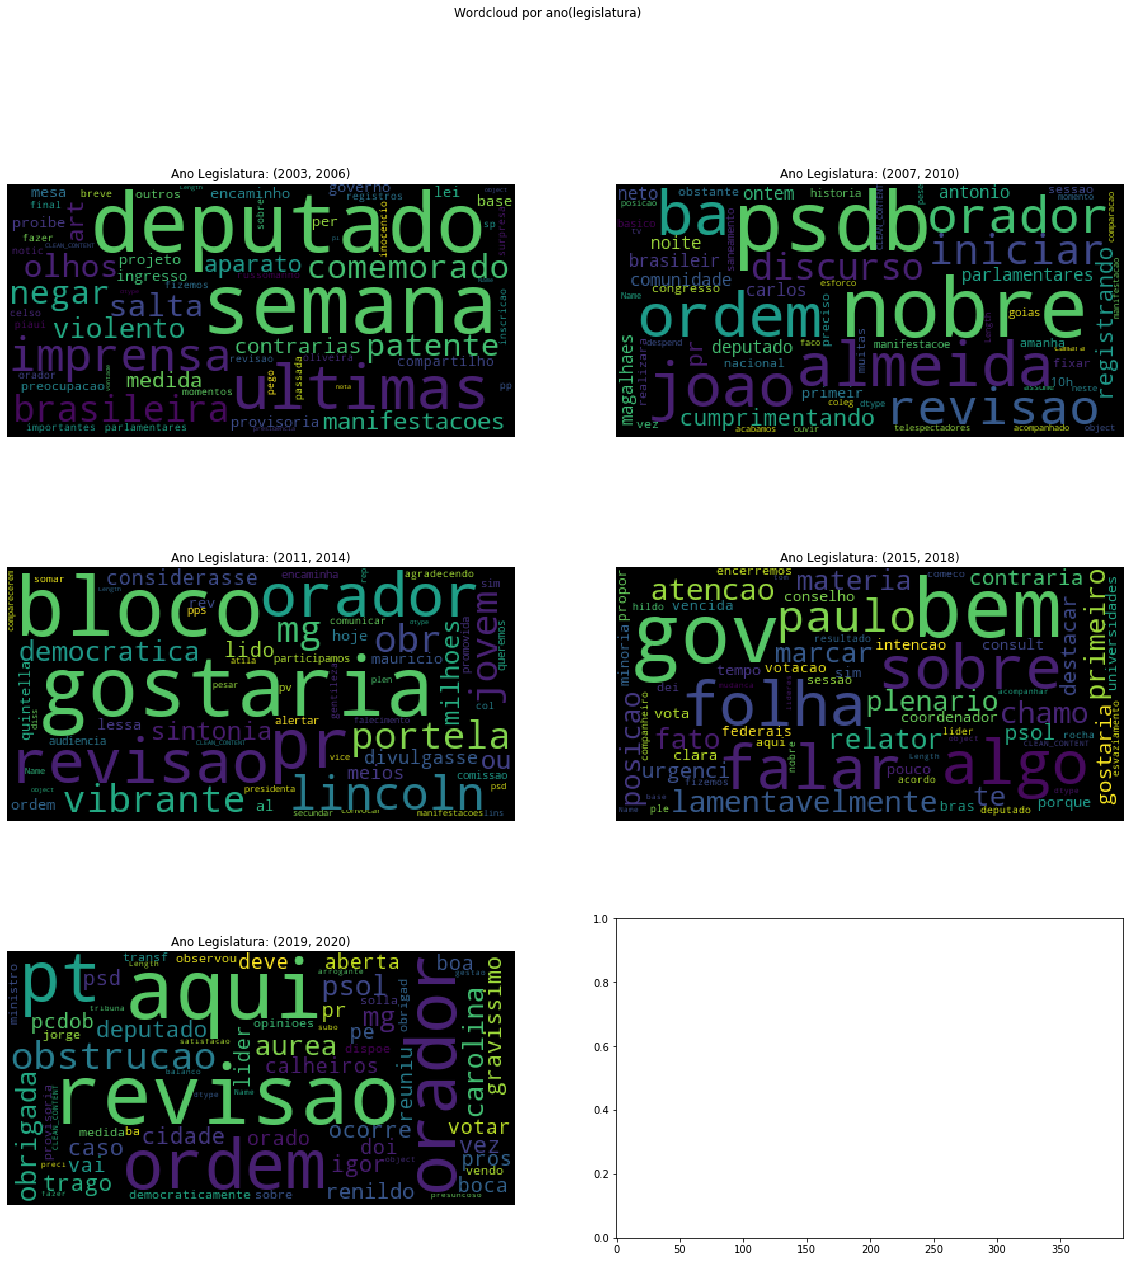

In [74]:
fig, axs = plt.subplots(nrows=3, ncols=2,figsize=(20,20), sharex=True)
for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    texto = discursos.loc[(discursos.YEAR >= lista_mandatos[i][0]) & 
                          (discursos.YEAR <= lista_mandatos[i][1]),'CLEAN_CONTENT']

    wordcloud = WordCloud(background_color='black',
                          #stopwords=stop_words,
                      max_words=100,
                      max_font_size=65, 
                      random_state=42
                     ).generate(str(texto))
    
    plt.imshow(wordcloud, cmap=plt.cm.jet)
    plt.axis('off')
    plt.title('Ano Legislatura: {}'.format(lista_mandatos[i]))
    if i == len(lista_mandatos)-1:
        break;
#plt.tight_layout()
plt.suptitle('Wordcloud por ano(legislatura)')
plt.show()

In [ ]:
# NOVAS STOPWORDS 'casa','nesta','desta', 'quero'